# **Лабораторна робота 5. Класифікація в банківській справі**

Метою лабораторної роботи є вивчення методів класифікації клієнтів у банківській справі згідно моделей машинного навчання.

Після завершення лабораторної роботи Ви зможете:

1. попередньо обробляти (нормалізовувати та перетворювати категорійні дані) та створювати Набір Даних
2. обирати вхідні поля
3. проводити класифікацію клієнтів
4. візуалізувати дерево рішень моделі класифікації

## Виконала: Олескевич Софія, КН-314

Статистика взаємно залежної інформації* Матеріали та методи
* Основна частина
  * Імпорт бібліотек
  * Завантаження даних
  * Підготовка даних
      * Перетворення даних
      * Кодування та нормалізація
  * Вибір вхідних полів
      * Критерій хі-квадрат
      * Статистика взаємно залежної інформації
      * Вага вхідних полів
      * Кореляційна матриця з Heatmap
  * Моделі класифікації
       * Створення навчальних та тестових наборів даних
       * Класифікатор Extra Trees
       * Логістична регресія
  * Дерево рішень
      * Побудова моделі
      * Візуалізація дерева рішень
* Завдання
* Автори


----

## Матеріали та методи

Дані, які ми будемо використовувати для цієї лабораторної роботи, є частиною набору маркетингових даних банку з відкритим вихідним кодом зі сховища UCI ML: https://archive.ics.uci.edu/ml/citation_policy.html.

> Цей набір даних є загальнодоступним для дослідження. Деталі описані в  [Moro et al., 2014].
Будь ласка, додайте цитування, якщо ви плануєте використовувати цю базу даних:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Під час роботи вирішується задача попереднього аналізу отримання позитивної відповіді (щодо строкового депозиту) при  прямих дзвінках з банку. По суті, завдання полягає в оцінюванні відповідно до вхідних полів клієнтів (потенційних клієнтів) та прогнозуванні їх поведінки (дефолт за кредитом, бажання відкрити депозит тощо).

У цій лабораторній роботі ми спробуємо дати відповіді на питання, які є актуальними при аналізі банківських даних:

1. Які бібліотеки Python найчастіше використовують для класифікаційного аналізу?
2. Як перетворити категорійні дані?
3. Як створити Набір Даних?
4. Як зробити вибірку за характерними ознаками?
5. Як створити, обрати та візуалізувати класифікаційну модель?

Також ми зробимо висновки щодо отриманих результатів класифікаційного аналізу для більш ефективного планування маркетингових кампаній у банківськиій сфері.

[Scikit-learn](https://scikit-learn.org/stable/) (раніше scikits.learn також відома як sklearn) це безкоштовна бібліотека для машинного навчання мовою програмування Python. Вона надає функціонал для створення та тренування різноманітних алгоритмів класифікації, регресії та кластеризації, таких як лінійна регресія, random forests, градієнтний бустинг, кластеризація методом к–середніх, алгоритм DBSCAN і призначена для взаємодії з бібліотеками NumPy та SciPy.

In [1]:
# conda install scikit-learn==0.24.2

## Імпорт бібліотек

Завантажимо дані використовуючи URL-адресу https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

Альтернативна URL-адреса для завантаження даних.

Імпортуємо бібліотеки, необхідні для використання в цій лабораторній роботі. Додати деякі псевдоніми для полегшення використання бібліотек у нашому коді та встановимо розмір фігури за замовчуванням для подальших графіків. Попередження слід ігнорувати.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

Далі вказуємо значення параметру `precision` рівне 2 для відображення двох знаків після коми (замість 6 за замовчуванням).

In [3]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

## Завантаження даних

Завантажуємо дані.

In [4]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
df.shape

(41188, 21)

Як можна побачити, набір даних складається з 21 стовпця. Останній стовпець є цільовим. Також набір даних складається з 41188 рядків.

<details>
<summary><b>Натисніть, щоб переглянути інформацію про атрибут</b></summary>
Вхідні поля (назви стовпців - пояснення (тип даних та допустимі значення)):

1. `age` - вік клієнта в роках (numeric)
2. `job` - тип професії (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - сімейний стан (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - освіта клієнта (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5. `default` - чи є кредит? (categorical: `no`, `yes`, `unknown`)
6. `housing` - чи є кредит на житло? (categorical: `no`, `yes`, `unknown`)
7. `loan` - чи має особистий кредит? (categorical: `no`, `yes`, `unknown`)
8. `contact` - тип комунікації (categorical: `cellular`, `telephone`)
9. `month` - останній місяць зв'язку в році (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - останній день зв'язку в тижні (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - тривалість останнього контакту, в секундах (numeric).
12. `campaign` - кількість контактів, здійснених для цього клієнта під час цієї кампанії (numeric, includes last contact)
13. `pdays` - кількість днів, що минули після останнього звернення до клієнта з попередньої кампанії  (numeric; 999 means the client has not been previously contacted)
14. `previous` - кількість контактів, здійснених для цього клієнта до початку кампанії  (numeric)
15. `poutcome` - результат попередньої маркетингової кампанії (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - коефіцієнт зміни зайнятості, квартальний показник  (numeric)
17. `cons.price.idx` - індекс споживчих цін, місячний показник (numeric)
18. `cons.conf.idx` - індекс споживчої довіри, місячний показник (numeric)
19. `euribor3m` - euribor на 3 місяці, денний показник (numeric)
20. `nr.employed` - кількість працівників, квартальний показник (numeric)

Вихідне поле (бажана мета):

21. `y` - чи підпише клієнт угоду строкового депозиту? (binary: `yes`,`no`)
</details>

Наша мета - створити класифікаційну модель, яка може передбачити, чи буде клієнт підписувати строковий депозит чи ні? Для цього проаналізуємо та підготуємо дані згідно типу моделі.

## Підготовка даних

### Перетворення даних

Перш за все, дослідимо, як pandas розпізнає типи особливостей (вхідних полів).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Як можна побачити, усі категорійні ознаки розпізналися як об’єкти. Ми повинні змінити їх тип на "categorical"(категорійні).

In [7]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Розглянемо розмір набору даних.

In [8]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

Щоб побачити всі унікальні значення окремого вхідного поля (стовпця), скористаємося

In [9]:
df['job'].unique()

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

Як було зазначено раніше, набір даних містить 41188 об’єктів (рядків), для кожного з яких встановлено 20 вхідних полів (стовпці) та 1 цільове (y). 11 вхідних полів, включаючи цільове, є категорійним типом. Значення такого типу даних не можна використовувати для класифікації. Ми повинні перетворити їх на int або float.
Для цього ми будемо використовувати **[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** та **[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)**. Ці функції можуть кодувати категорійні ознаки як цілочисельний масив.

Спершу розділимо Набір Даних на вхідний та вихідний Набори Даних

In [10]:
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column

### Кодування та нормалізація

Далі створюємо список категорійних полів і перетворюємо їх значення на цілочисельні масиви: (Замініть ##YOUR CODE GOES HERE## вашим кодом Python).

In [11]:
col_cat =  ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
oe = OrdinalEncoder()
oe.fit(X[col_cat])
X_cat_enc = oe.transform(X[col_cat])

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
col_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
Or

col_cat = list(df.select_dtypes(include=['category']).columns)

    </code>
</details>

In [12]:
X_cat_enc

array([[3., 1., 0., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       ...,
       [5., 1., 6., ..., 7., 0., 1.],
       [9., 1., 5., ..., 7., 0., 1.],
       [5., 1., 5., ..., 7., 0., 0.]])

Далі ми повинні перетворити масиви знову в DataFrame:

In [13]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00


Числові поля можуть мати різний порядок і також містити від’ємні значення. Це призведе до помилок заокруглення та появи вийнятків у деяких методах ШІ. Щоб цього уникнути, необхідно нормалізувати вхідні поля.

Створимо список числових полів і нормалізуємо його за допомогою  **[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)**

In [14]:
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
    </code>
</details>

In [15]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

Як і в попередньому випадку, перетворимо отримані масиви знову на DataFrame

In [16]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...
41183,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


Далі об'єднаємо DataFrame-и в однин вхідний DataFrame

In [17]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
    </code>
</details>



Таке ж перетворення ми повинні зробити для цільового поля.

In [18]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.columns = y.name

In [19]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: category
Categories (2, object): ['no', 'yes']

In [20]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Length: 41188, dtype: int32

Як видно, значення 'no' було змінене на 0, 'yes' на 1

## Вибір вхідних полів

Як було зазначено раніше, вхідні поля містять 20 характеристик. Зрозуміло, деякі з них є більш важливими для класифікації.

Існують два популярні методи вибору вхідних полів, які можна використовувати для категорійних вхідних даних, і категорійної (класової) цільової змінної.

Це:

* Критерій хі-квадрат.
* Статистика взаємно залежної інформації

Розглянемой детальніше  кожен із них.

Для цього будемо використовувати **[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)**

### Критерій хі-квадрат

Статистична гіпотеза хі-квадрат Пірсона є прикладом перевірки на незалежність між категорійними змінними.

Більше інформації про цей статистичний тест можна отримати за посиланням:

[A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
Результати цього тесту можна використати для вибору об’єктів, тобто ті об’єкти, від яких не залежить цільова змінна, можна видалити з набору даних.

Бібліотека scikit-learn забезпечує реалізацію тесту хі-квадрат функцією **[chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)**. Ця функція може бути використана в стратегії вибору вхідних полів, наприклад, у виборі k найважливіших ознак (найбільших значень) за допомогою класу SelectKBest.

Наприклад, ми можемо визначити клас SelectKBest для використання функції chi2() і вибрати всі (або найважливіші) вхідні поля, а потім перетворити тренувальні і тестові набори.

Застосуємо клас SelectKBest, щоб отримати 10 найважливіших вхідних полів

In [21]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

об'єднаємо два DataFrame з даними для кращої візуалізації

In [22]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs  Score
18     euribor3m 890.69
6           loan 547.96
15  emp.var.rate 541.30
19   nr.employed 502.66
14      poutcome 441.45
11      campaign 358.02
3      education 321.92
2        marital 167.61
13      previous 157.98
9    day_of_week  98.23


### Статистика взаємно залежної інформації

Взаємно залежна інформація в галузі теорії інформації - це міра взаємної залежності між двома змінними (зазвичай застосовується при побудові дерев рішень), що використовується для вибору характерних ознак.

Взаємно залежна інформація обчислюється між двома змінними і дає змогу виміряти зменшення невизначеності для однієї змінної з урахуванням відомого значення іншої змінної.

[Ви можете дізнатися більше про взаємну інформацію в посібнику.](https://machinelearningmastery.com/information-gain-and-mutual-information)

Бібліотека машинного навчання scikit-learn забезпечує реалізацію взаємно залежної інформації для вибору вхідних полів за допомогою функції  **[mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)**.

Як і chi2(), її можна використовувати із методом для вибору вхідних полів SelectKBest (та іншими методами).

In [23]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


             Specs  Score
11        campaign   0.08
18       euribor3m   0.07
17   cons.conf.idx   0.07
16  cons.price.idx   0.07
19     nr.employed   0.06
15    emp.var.rate   0.06
9      day_of_week   0.04
13        previous   0.04
7          contact   0.03
14        poutcome   0.02


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc,y_enc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
    </code>
</details>




Як бачимо, ці дві функції вибирають різні вагомі вхідні поля.

### Вага вхідних полів

Вагу кожного вхідного поля вашого DataFrame можна отримати використовуючи властивість ваги вхідних полів для конкретної моделі класифікації.
Вага вхідного поля дає оцінку кожного вхідного поля ваших даних, чим вища оцінка, вагомішим чи релевантнішим є вхідне поле щодо вихідної змінної.
Наприклад:
Feature importance - це вбудований клас, який поставляється разом **[Tree Based Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)**, ми будемо використовувати Extra Tree Classifier для отримання 10 найвагоміших вхідних полів для набору даних.

Створимо та застосуємо модель:

In [24]:
model = ExtraTreesClassifier()
model.fit(x_enc,y_enc)

ExtraTreesClassifier()

Використаємо вбудований клас feature_importances класифікатора tree_based

In [25]:
print(model.feature_importances_)

[0.05785359 0.03461195 0.05448707 0.01049468 0.02643895 0.01975549
 0.01315005 0.01649383 0.04889025 0.03166322 0.08877211 0.26422699
 0.05943515 0.04692265 0.0131165  0.02698483 0.01822236 0.0236965
 0.09677301 0.04801079]


Перетворимо у Series та побудуємо графік значущості вхідних полів для кращої візуалізації

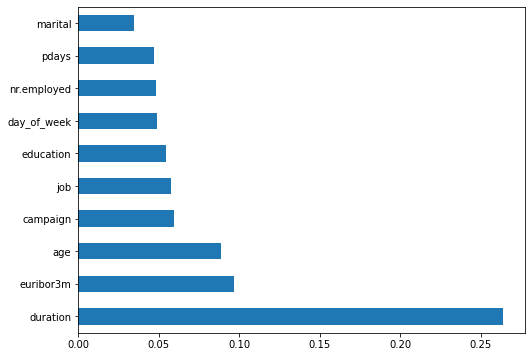

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Бачимо, що для Extra Tree Classifier значущість вхідних полів відрізняються від попередніх випадків. Це означає, що немає чітких правил для їх вибору. І значення вхідних полів строго залежить від моделі.

### Кореляційна матриця з Heatmap

Кореляційна матриця показує зв'язок між вхідними полями.
Числове значення може бути додатнім (при збільшенні значення одного вхідного поля збільшується значення іншого) або від'ємним (при збільшенні значення одного вхідного поля зменшується значення іншого)
Heatmap дозволяє легко визначити, які вхідні поля найбільше пов'язані один з одним. Побудуємо heatmap корельованих вхідних полів використовуючи бібліотеку seaborn.

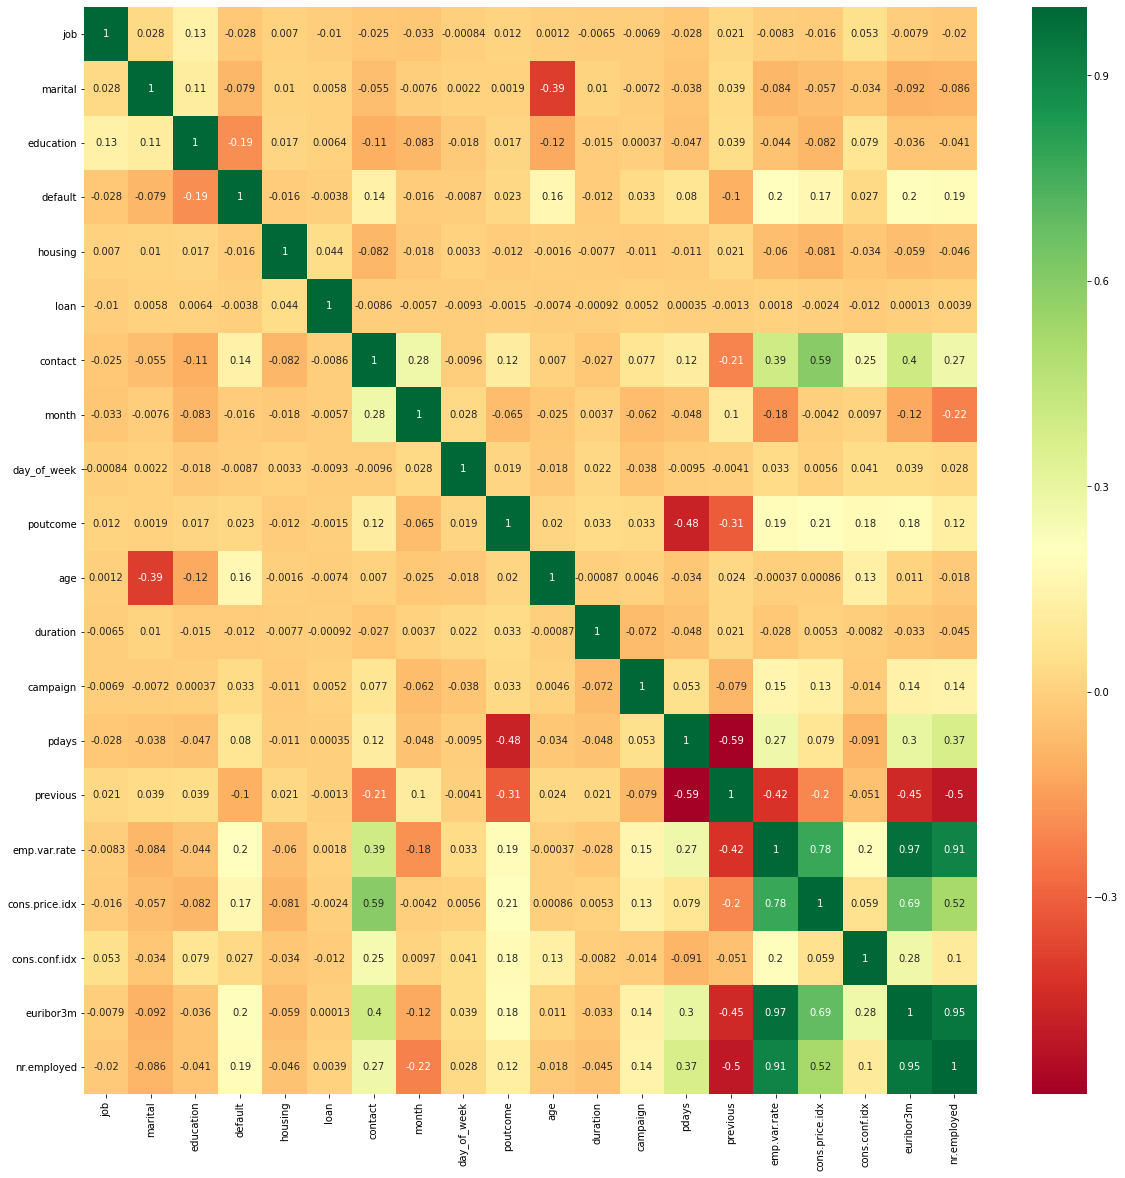

In [27]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Як можна побачити, поля 'euribor3m', 'emp.var.rate', 'nr.employed' строго корелюють між собою. Це означає, що два з них потрібно вилучити з розрахунку, оскільки між ними є лінійні залежності. Якщо ми знаємо одне з них, ми можемо легко обчислити ще два. Видаляємо "emp.var.rate" та "nr.employed"


In [28]:
col = x_enc.columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [29]:
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']
    </code>
</details>




In [30]:
x_enc = x_enc[col]

## Моделі класифікації

### Створення тренувальних та тестових наборів даних

Перш за все, потрібно виокремити дані для навчальних та тестових наборів даних для точності обчислень при моделюванні. Для цього використаємо **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**. Розділимо набори даних у пропорції 0.33 train/test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (27595, 18)
X_test: (13593, 18)
y_train: (27595,)
y_test: (13593,)


Можна побачити, що навчальний набір даних складається з 27595 рядків. Тестовий з 13593.

### Класифікатор Extra Trees

Створимо і застосуємо ExtraTreesClassifier до навчального набору даних і обчислимо точність класифікації:

In [33]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

Оцінимо моделі на основі тестових даних для отримання прогнозів:

In [34]:
yhat = model.predict(X_test)
print(yhat)

[0 0 0 ... 1 0 0]


Оцінимо точність:

In [35]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.80


### Логістична регресія

Як можна побачити, точність цієї моделі дуже хороша.

Існує багато різних методів оцінки вхідних полів та вибору вхідних полів на основі цих оцінок; як дізнатись, який із них використовувати?

Надійний підхід полягає в оцінці моделей з використанням різних методів вибору вхідних полів (та кількостівхідних полів) та вибору методу, використання якого найкраще підходить для моделі.

**[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** є хорошою моделлю для перевірки методів вибору вхідних полів, оскільки може працювати краще, якщо з моделі вилучити незначущі вхідні поля. Використаємо цю модель аналогічно до попередньої.

In [36]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.01


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
    </code>
</details>

Як бачимо, точніть зросла.

## Дерево рішень

### Побудова моделі

Як можна побачити вище, попередні методи мають високу точність. Однак найбільший недолік - неможливість візуалізувати або обґрунтувати рішення.

Дерева рішень є популярним керованим методом навчання з різних причин. Перевагами дерев рішень є можливість їх використання як для регресії, так і для класифікації, вони не потребують масштабування функцій, і їх відносно легко інтерпретувати, оскільки можлива візуалізація дерева рішень. Це не тільки потужний спосіб зрозуміти суть моделі, але й роз'яснити, як вона працює. Отже, було б корисно знати, як зробити візуалізацію на основі даної моделі.

**[Дерева рішень](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**  - це керований алгоритм, який використовується в машинному навчанні. Він використовує бінарне дерево (кожен вузол має двох дочірніх елементів) для визначення цільового значення кожної вибірки даних. Цільові значення представлені в листі дерева. Щоб дістатися до листя, потрібно пройти через вузли, починаючи з кореневого вузла. У кожному вузлі приймається рішення, до якого вузла-нащадка потрібно йти далі. Рішення приймається на основі ознак вибраного зразка. Навчанняя дерева рішень - це процес пошуку оптимальних правил у кожному внутрішньому вузлі дерева відповідно до обраної метрики.


Цей метод також дозволяє розрахувати ваги вхідних полів.
Обчислимо їх. Виберемо 10 найкращих з них. Оновимо модель та візуалізуємо дерево рішень.

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 89.01


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
    </code>
</details>



In [38]:
print("Features impotance:", model.feature_importances_)

Features impotance: [0.04617255 0.02328542 0.04043327 0.0077432  0.0168781  0.01446651
 0.00886229 0.01497274 0.03698956 0.02114203 0.09155291 0.34944939
 0.02960179 0.01565579 0.00908977 0.01562178 0.03410504 0.22397786]


Побудуємо графік ваги вхідних полів для кращої візуалізації.

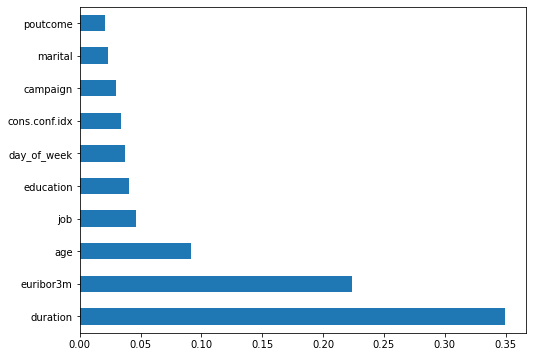

In [39]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Обираємо 10 найвагоміших:

In [40]:
feat_importances.nlargest(10)

duration        0.35
euribor3m       0.22
age             0.09
job             0.05
education       0.04
day_of_week     0.04
cons.conf.idx   0.03
campaign        0.03
marital         0.02
poutcome        0.02
dtype: float64

Створюємо список вхідних полів

In [41]:
col = feat_importances.nlargest(10).index
col

Index(['duration', 'euribor3m', 'age', 'job', 'education', 'day_of_week',
       'cons.conf.idx', 'campaign', 'marital', 'poutcome'],
      dtype='object')

Оновимо модель використовуючи найвагоміші вхідні поля

In [42]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.96


Як можна побачити, точність погіршилась, оскільки використовувались не всі вхідні поля.

### Візуалізація дерева рішень

Існує декілька способів реалізації візуалізації дерева рішень

### _Текстова візуалізація_

In [43]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.11
|   |--- feature_1 <= 0.13
|   |   |--- feature_0 <= 0.03
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- feature_0 <= 0.03
|   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.13
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  0.02
|   |   |   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   

Дає змогу збереження у файл:

In [44]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### _Графічне зображення_

Можна побудувати дерево, використовуючи два різних шляхи:

**[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)** (повільна візуалізація - це може зайняти деякий час):


In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = col,
               class_names = y.unique(),
               filled = True)

Error in callback <function flush_figures at 0x000002487C5E0A60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig.savefig('decision_tree.png')

Або можна використати більш швидкий функціонал - бібліотеку **[python-graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)** .

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model,
               feature_names = col,
               class_names = y.unique(),
                                filled=True)

Після створення можна намалювати граф

In [ ]:
graph = graphviz.Source(dot_data, format="png")
graph

І передати його у файл:

In [ ]:
graph.render("decision_tree_graphivz")

## Завдання

In [ ]:
model = ExtraTreesClassifier

**Завдання 1** Створіть функцію користувача, яка буде обчислювати точність визначеної класифікаційної моделі

In [ ]:
def model_ac(x_train, y_train, x_test, y_test, clf):
     model = clf()
     model.fit(x_train, y_train)
     yhat = model.predict(x_test)
     accuracy = accuracy_score(y_test, yhat)
     return accuracy

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
    model = clf()
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    return accuracy
    </code>
</details>

In [ ]:
print('Accuracy: %.2f' % (model_ac(X_train, y_train, X_test, y_test, model)*100))

**Завдання 2** Створіть функцію користувача, яка буде обчислювати вагу вхідних полів визначеної класифікаційної моделі.

In [ ]:
def model_imp(x_train, y_train, clf):
    model = clf()
    model.fit(x_train, y_train)
    feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
    return feat_importances.sort_values(ascending=False)

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
    model = clf()
    model.fit(x_train, y_train)
    feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
    return feat_importances.sort_values(ascending=False)
    </code>
</details>

In [ ]:
imp = model_imp(X_train, y_train, model)
print(imp)

**Завдання 3** Побудуйте графік, який показує точність залежності визначеної моделі від кількості вхідних елементів

In [ ]:
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(X_train[col], y_train, X_test[col], y_test, model))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary>
<code>
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(X_train[col], y_train, X_test[col], y_test, model))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()
    </code>
</details>

## Індивідуальне завдання.

**Завдання ** Виконайте завдання 1-3, та зробіть власні висновки з виконання лаболаторної роботи

## Висновок

У цій лабораторній роботі ми навчилися робити попередню обробку даних. Зокрема,
змінювати типи даних, нормалізувати та обробляти категорійні дані.
Було показано, як зробити вибір вхідних полів різними методами, будувати навчальні та тестові набори даних.
Показано, як працювати з різними класифікаторами, візуалізувати дерево рішень. В
результаті лабораторної роботи вивчено, як на основі статистичної бази даних передбачити,
чи буде клієнт підписувати строковий депозит чи ні.
Точність прийняття рішення становить близько 90%